<a href="https://colab.research.google.com/github/nirmit27/ml-notebooks/blob/main/ML/Apriori_ARL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Apriori** Algorithm for **Association Rule Learning**

### Importing the necessary modules

In [5]:
!pip install --upgrade ipykernel

from google.colab import drive
drive.mount('/content/drive/')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/drive/


In [24]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter
from mlxtend.frequent_patterns import apriori, association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Reading the **transactions**

In [7]:
groceries = []
with open(r"/content/drive/MyDrive/Colab Notebooks/Training-and-Placement-2024/data/groceries.csv", 'r') as input_data:
  groceries = input_data.read().split("\n")

print(f"Number of transactions : {len(groceries)}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of transactions : 9836


### Obtaining the **items** in each transaction

In [8]:
transactions = []
for transaction in groceries:
  transactions.append(transaction.split(","))

len(transactions)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


9836

### Obtaining the **unique** items and their **frequencies**

In [9]:
items_ = [item for transaction in transactions for item in transaction]
item_counts = Counter(items_)

# Removing an empty '' item
del item_counts[""]

# for key, value in item_counts.items():
#   print(f"{key} : {value}")

list(item_counts.items())[:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('citrus fruit', 814),
 ('semi-finished bread', 174),
 ('margarine', 576),
 ('ready soups', 18),
 ('tropical fruit', 1032)]

### Storing item **names** and **frequency** seperately
> In **descending** order

In [10]:
temp = sorted(item_counts.items(), key=lambda x: x[1], reverse=True)
freq_sorted = [x[1] for x in temp]
items_sorted = [x[0].title() for x in temp]

items_sorted[:5], freq_sorted[:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(['Whole Milk', 'Other Vegetables', 'Rolls/Buns', 'Soda', 'Yogurt'],
 [2513, 1903, 1809, 1715, 1372])

In [22]:
print(f"Number of items : {len(items_sorted)}")

Number of items : 169


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Plotting the item **frequencies**
> Only the **top 10** items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


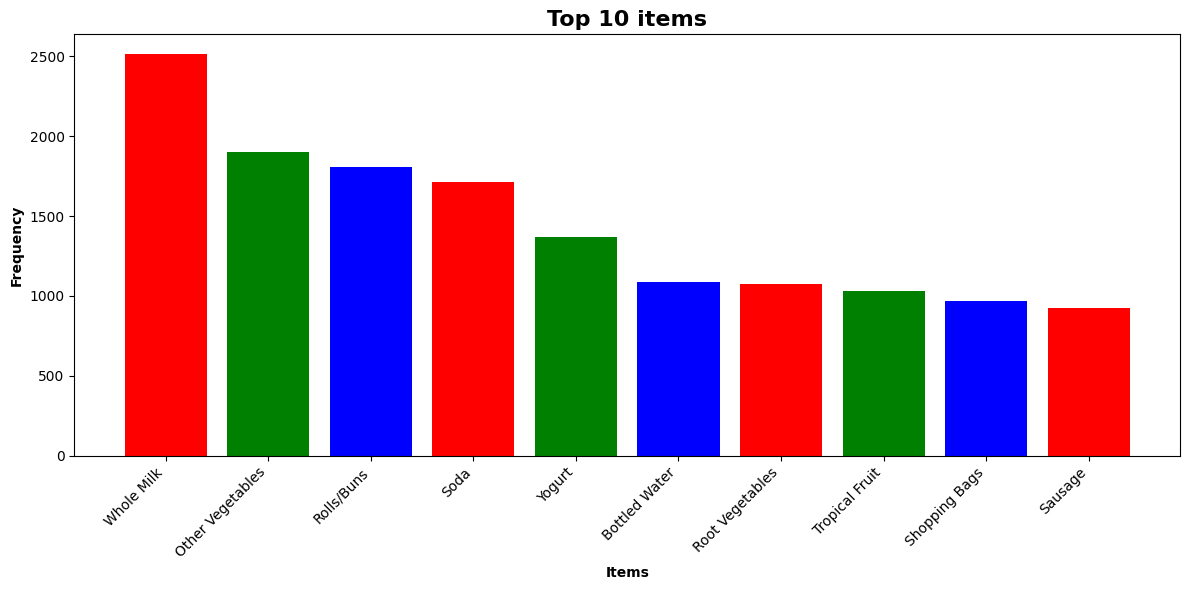

In [41]:
plt.figure(figsize=(12, 6))
plt.bar(height = freq_sorted[0:10], x = items_sorted[0:10], color=['r', 'g', 'b'])

plt.title("Top 10 items", fontweight='bold', fontsize=16)
plt.xlabel("Items", fontweight='bold',)
plt.ylabel("Frequency", fontweight='bold',)

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Creating a **dataframe** for the transactions

In [15]:
df = pd.DataFrame(pd.Series(transactions), columns = ["Transactions"])
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transactions
0,"[citrus fruit, semi-finished bread, margarine,..."
1,"[tropical fruit, yogurt, coffee]"
2,[whole milk]
3,"[pip fruit, yogurt, cream cheese , meat spreads]"
4,"[other vegetables, whole milk, condensed milk,..."


### Creating **dummy columns** for each item in a transaction

In [26]:
X = df['Transactions'].str.join(sep="*").str.get_dummies(sep="*")
X.iloc[:5, :5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


### Creating frequent **item-sets**
> Using the `apriori` method, that returns the corresponding `DataFrame` with the support values computed for each item-set

In [57]:
freq_itemsets = apriori(X, min_support = 0.0075, max_len = 4, use_colnames = True)
# freq_itemsets[-6: -1]
freq_itemsets.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


(531, 2)

### Sorting the item-sets
> In **decreasing** order of their `support` values

In [58]:
freq_itemsets.sort_values(by='support', ascending=False, inplace=True)
freq_itemsets.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
100,0.255490,(whole milk)
63,0.193473,(other vegetables)
77,0.183916,(rolls/buns)
86,0.174359,(soda)
101,0.139488,(yogurt)


### Plotting the item-sets' `support`
> Only the **top 10** item-sets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


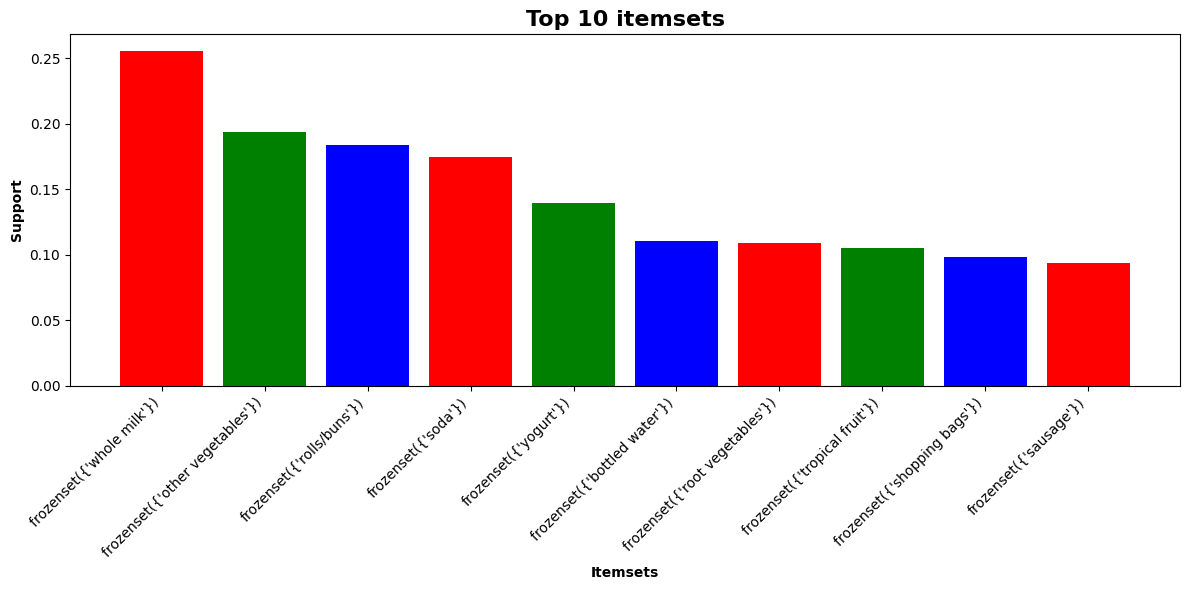

In [59]:
plt.figure(figsize=(12, 6))
plt.bar(height = freq_itemsets.support[0:10], x = list(range(0, 10)), color=['r', 'g', 'b'])

plt.title("Top 10 itemsets", fontweight='bold', fontsize=16)
plt.xlabel("Itemsets", fontweight='bold',)
plt.ylabel("Support", fontweight='bold',)

plt.xticks(list(range(0, 10)), freq_itemsets.itemsets[0:10], rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Generating the **association rules**
> Using the `association_rules` method, which returns the corresponding `DataFrame` that contains the association rules for potential antecedent-consequent sets

In [61]:
rules = association_rules(freq_itemsets, metric = "lift", min_threshold = 1)
rules.sort_values('lift', ascending = False, inplace=True)

rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1173,"(yogurt, other vegetables)","(tropical fruit, whole milk)",0.043412,0.042294,0.007625,0.175644,4.152968,0.005789,1.161763,0.793663
1172,"(tropical fruit, whole milk)","(yogurt, other vegetables)",0.042294,0.043412,0.007625,0.180288,4.152968,0.005789,1.166981,0.792736
1090,"(whole milk, other vegetables)","(yogurt, root vegetables)",0.074827,0.025824,0.007828,0.104620,4.051331,0.005896,1.088003,0.814083
1091,"(yogurt, root vegetables)","(whole milk, other vegetables)",0.025824,0.074827,0.007828,0.303150,4.051331,0.005896,1.327649,0.773133
793,(whipped/sour cream),(berries),0.071675,0.033245,0.009048,0.126241,3.797272,0.006666,1.106432,0.793530


### Formatting the rules for **display**

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/association-rule-learning2.png">

> Printing the top 5 rules (by `lift`) in the above format

In [136]:
rules["formatted_rule"] = rules.apply(lambda row: f"{{{', '.join(row['antecedents'])}}} -> {{{', '.join(row['consequents'])}}} | LIFT = {row['lift']:.2f}", axis=1)

for rule in rules["formatted_rule"].head():
  print(rule)

{yogurt, other vegetables} -> {tropical fruit, whole milk} | LIFT = 4.15
{tropical fruit, whole milk} -> {yogurt, other vegetables} | LIFT = 4.15
{whole milk, other vegetables} -> {yogurt, root vegetables} | LIFT = 4.05
{yogurt, root vegetables} -> {whole milk, other vegetables} | LIFT = 4.05
{whipped/sour cream} -> {berries} | LIFT = 3.80


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
